In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from datasets import load_from_disk
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys
sys.path.append("../tools")
from utils import get_histograms

In [28]:
data = load_from_disk("../../data/medium/train").shuffle(seed=7)

In [29]:
n_images = 4

X = data["image"]
y = data["label"]
get_label = lambda i : "real" if i == 1 else "fake"

real_images = []
fake_images = []

i = 0
while len(real_images) != n_images or len(fake_images) != n_images:
    if get_label(y[i]) == "real" and len(real_images) < n_images:
        real_images.append(X[i])
    elif get_label(y[i]) == "fake" and len(fake_images) < n_images:
        fake_images.append(X[i])
    i += 1

In [30]:
real_histograms = np.array([(get_histograms(im,"RGB"), get_histograms(im,"HSV")) for im in real_images])
fake_histograms = np.array([(get_histograms(im,"RGB"), get_histograms(im,"HSV")) for im in fake_images])

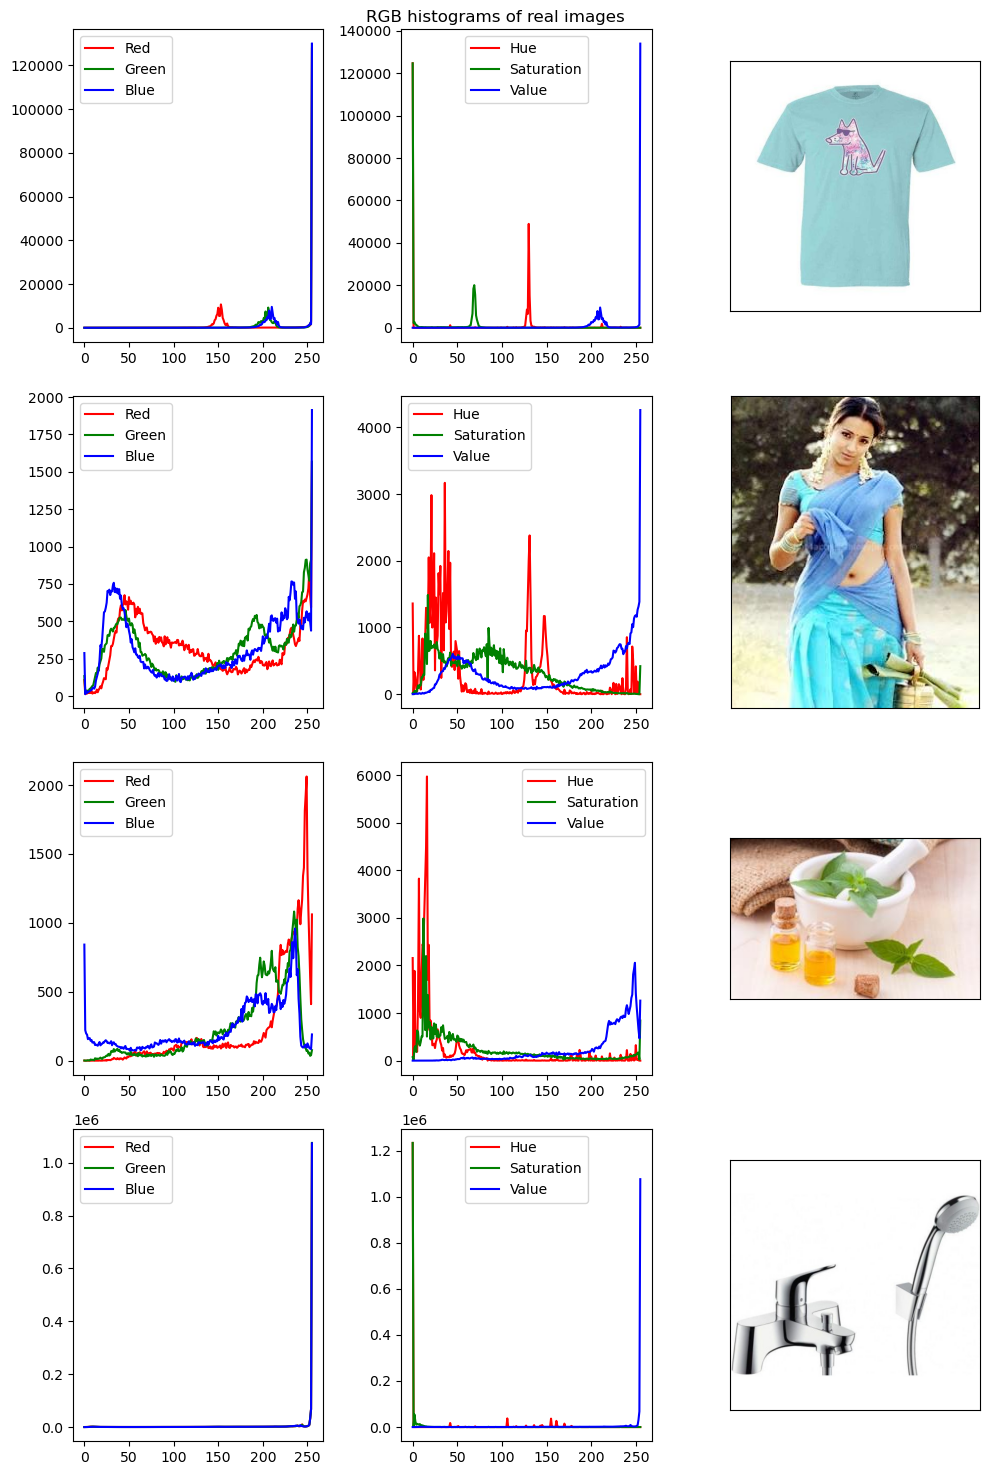

In [31]:
fig, axs = plt.subplots(n_images,3,figsize=(10,15))
fig.suptitle("RGB histograms of real images")
fig.set_tight_layout(True)
label = lambda j : ("Red", "Green", "Blue") if j == 0 else ("Hue","Saturation","Value")
for i in range(n_images):
    for j in range(2):
        axs[i,j].plot(real_histograms[i][j][0],"-r",label=label(j)[0])
        axs[i,j].plot(real_histograms[i][j][1],"-g",label=label(j)[1])
        axs[i,j].plot(real_histograms[i][j][2],"-b",label=label(j)[2])
        axs[i,j].legend()
    axs[i,2].imshow(np.asarray(real_images[i]))
    axs[i,2].set_xticks([])
    axs[i,2].set_yticks([])
plt.show()

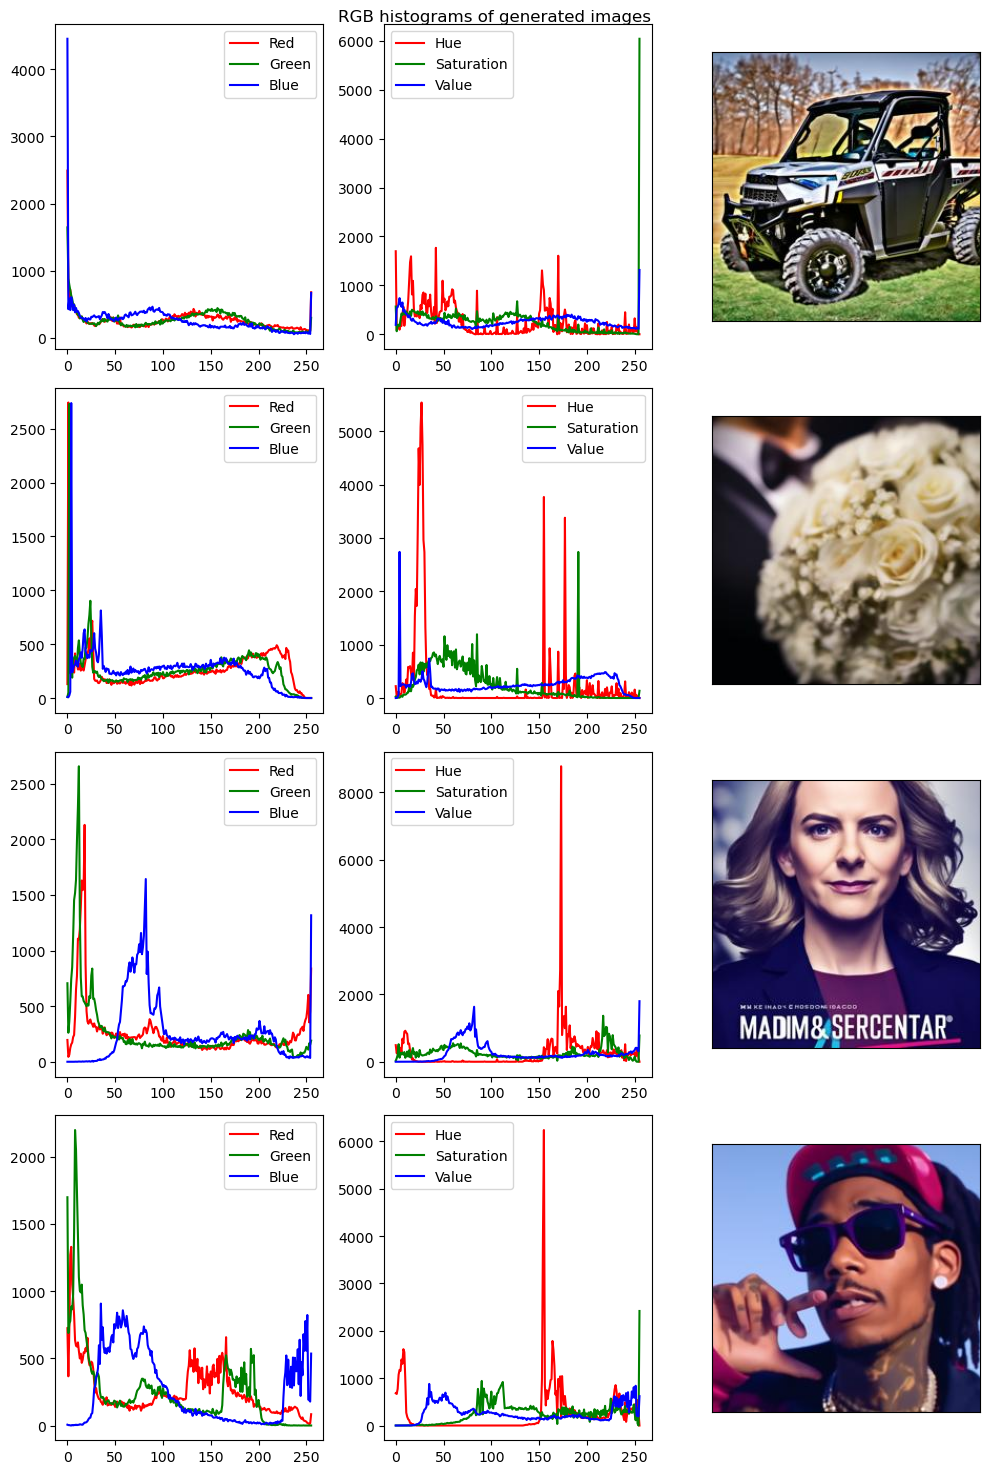

In [32]:
fig, axs = plt.subplots(n_images,3,figsize=(10,15))
fig.suptitle("RGB histograms of generated images")
fig.set_tight_layout(True)
label = lambda j : ("Red", "Green", "Blue") if j == 0 else ("Hue","Saturation","Value")
for i in range(n_images):
    for j in range(2):
        axs[i,j].plot(fake_histograms[i][j][0],"-r",label=label(j)[0])
        axs[i,j].plot(fake_histograms[i][j][1],"-g",label=label(j)[1])
        axs[i,j].plot(fake_histograms[i][j][2],"-b",label=label(j)[2])
        axs[i,j].legend()
    axs[i,2].imshow(np.asarray(fake_images[i]))
    axs[i,2].set_xticks([])
    axs[i,2].set_yticks([])
plt.show()